In [14]:
from pymongo import MongoClient
import matplotlib.pyplot as plt
import numpy
import pandas as pd
from IPython.display import display_html

# mongo configuration
myclient = MongoClient("mongodb://localhost:27017/")
mydb = myclient["uefa"]
mycol = mydb["players"]

#All of teams with red cards
total = [{}]
#Name of teams
teams = [{}]
#Amount of red cards the team has
score ={}

#returns team names
for item in mycol.find({},{ "_id" : 0, "team": 1}):
    teams.append(item)
    
#returns team names and red cards    
for item in mycol.find({},{ "_id" : 0, "team": 1, "red cards" : 1}):
    total.append(item)

In [15]:
#counter
i=0

for row in total:
    for item in row:
        #If the team name matches in both dics and is not empty
        if row["team"]==teams[i]["team"] and row["team"]!='' and isinstance(row["red cards"], int):
            #Team name variable
            team_name=row["team"]
            #If the team name exists
            if team_name in score:
                #Because of the fors, the number is divided by two
                score[team_name]+=row["red cards"]/2
            else:
                score[team_name]=row["red cards"]/2
    i=i+1

In [16]:
#number is rounded, so it parses to int from float, this value is ready for pie chart
#print(round(score["TEAMNAME"])) #for example Atalanta BC

#two dicts for teams that dont have any cards and for teams that have some cards
zero_cards={}
some_cards={}

#sorting the teams based on the number of their card
for k, v in score.items():
    if v == 0:
        zero_cards[k]=v
    else:
        some_cards[k]=v

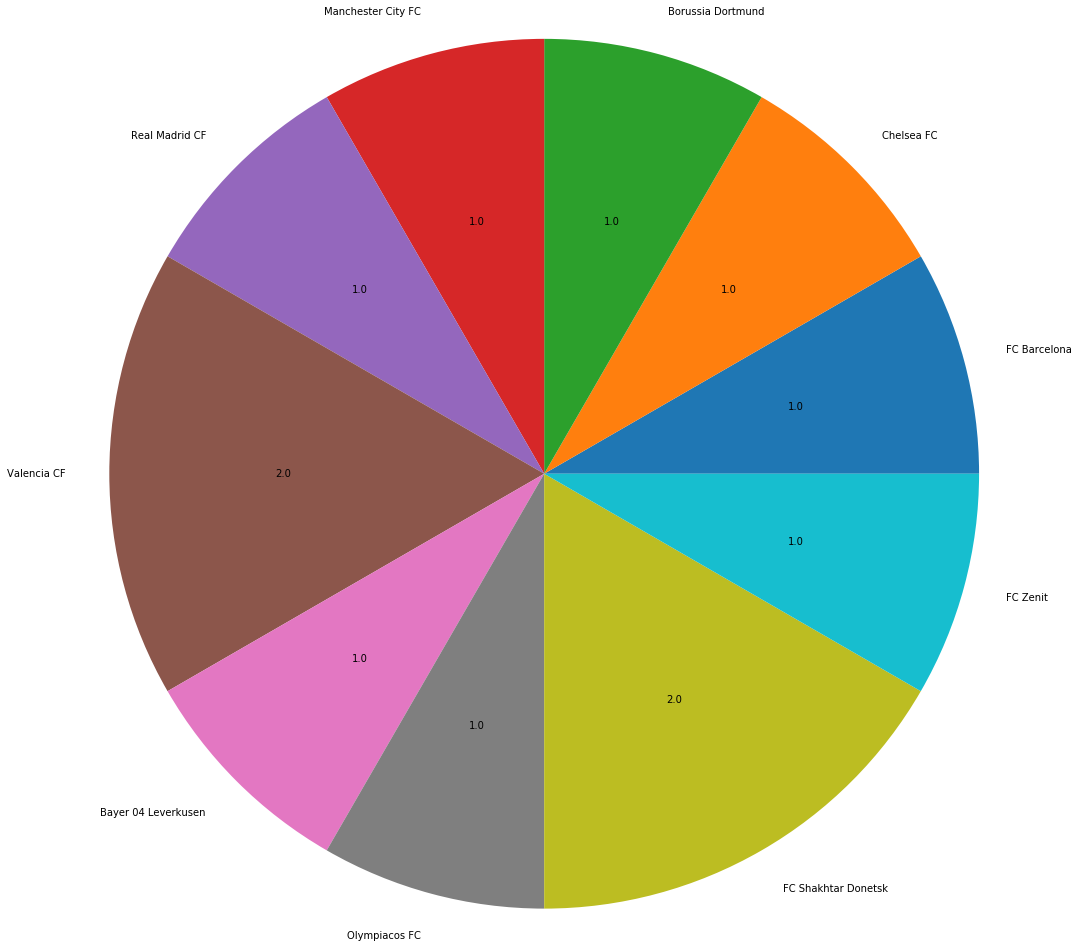

,Teams with zero cards
0,Atalanta BC
1,Club Atlético de Madrid
2,RB Leipzig
3,Paris Saint-Germain
4,FC Bayern München
5,Juventus
6,Liverpool FC
7,Olympique Lyonnais
8,SSC Napoli
9,Tottenham Hotspur


In [21]:
#panda dataframe for the pie chart
df=pd.DataFrame(some_cards.items(), columns=['Team Name', 'Num of cards'])

#panda dataframe for teams with zero cards
zr=pd.DataFrame(zero_cards.keys(), columns=['Teams with zero cards'])

#function to round up number of cards
def absolute_value(val):
    
    a  = numpy.round(val/100.*df['Num of cards'].sum(), 0)
    return a


plt.pie(
    #the values are number of cards
    df['Num of cards'],
    # with the labels being team names
    labels=df['Team Name'],
    #this prints the number of cards to pie chart
    autopct=absolute_value,
    radius=5
    )

# View the plot
plt.show()

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
first30 = zr.head(30)
last30 = zr.tail(30)
first15 = first30.head(15)
second15 = first30.tail(15)
third15 = last30.head(15)
fourth15 = last30.tail(15)

display_side_by_side(first15, second15, third15, fourth15)